In [1]:
import Pkg
Pkg.activate("Poisson")

  Activating project at `~/Documents/Courses/Spring2024/HPC_Lab/project06/possion_julia/Poisson`


In [2]:
# Pkg.add("FFTW") # to add packages to local env

In [2]:
using Plots
using LinearAlgebra
using IterativeSolvers
using Revise
using LinearMaps
using FFTW

In [3]:
begin
    includet("poisson.jl")
end

# Set up

In [4]:
L = 2;
N = 2^4;
Δx = L / (N - 1);

x = -1:Δx:1;

# Analytic solution

In [ ]:
poisson_analytic_ = [poisson_analytic(i, j) for i in x, j in x];

In [ ]:
surface(poisson_analytic_,
    title="Analytical solution", xlabel="x", ylabel="y", zlabel="u(x,y)")

# Task 1

Finite difference, matrix based method


Poisson equation

-∇² u(x,y) = f(x,y)

-(∂²/∂x²) u(x,y) - (∂²/∂y²) u(x,y) = f(x,y)


In [5]:
A = create_A(N, L);

In [6]:
# constant source term
f = zeros(N * N) .+ 20;

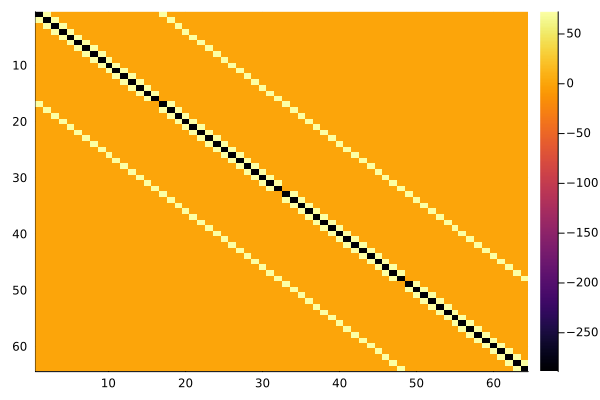

In [7]:
heatmap(A[1:2^6, 1:2^6], yflip=true)

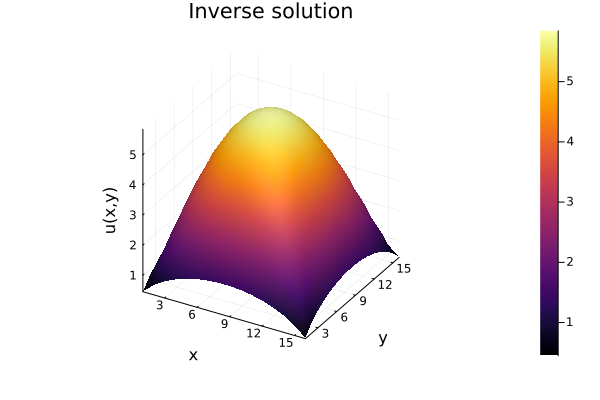

In [8]:
# using inverse
u = reshape(inv(-A) * f, N, N);
surface(u, title="Inverse solution", xlabel="x", ylabel="y", zlabel="u(x,y)")

In [ ]:
# using conjugate gradient methos
u = reshape(cg(A, -f), N, N);
surface(u, title="CG solution", xlabel="x", ylabel="y", zlabel="u(x,y)")

# Task 2
Finite - differences, matrix - free

In [ ]:
Ng = N^2;
A = LinearMap(x -> create_A(N, L, x), Ng, Ng)
A * ones(Ng) == create_A(N, L) * ones(Ng)  # Test that linear map and A*x give the same result.

In [ ]:
u = reshape(cg(A, -f), N, N);
surface(u, title="CG solution, Matrix Free", xlabel="x", ylabel="y", zlabel="u(x,y)")

# Task 3

Spectral methods


Hints: Since we are using Dirichlet boundary conditions we don’t want the usual discrete Fourier
transform, but rather the discrete sine transform (DST, a.k.a. the “odd” Fourier transform). In
Julia this is called with FFTW.r2r(f,FFTW.RODFT00), where f is the function that we want to
transform.


In [6]:
c = 2 * pi / L;

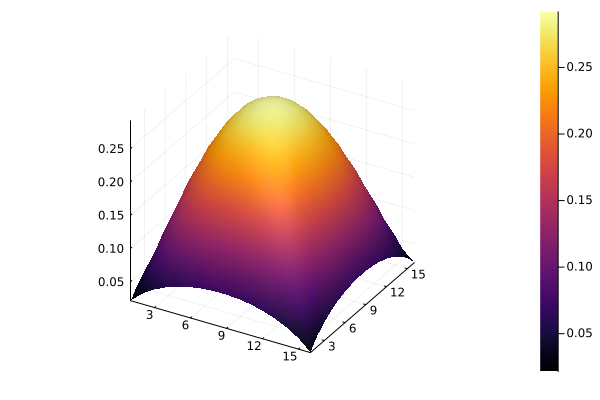

In [12]:
f = [1 for i in x, j in x];
bₖ = FFTW.r2r(f, FFTW.RODFT00);
aₖ = 4 * [bₖ[k, l] / (c^2 * (k^2 + l^2)) for k = 1:N, l = 1:N]

# inverse fourier transform
u = FFTW.r2r(aₖ, FFTW.RODFT00) / (2(N + 1))^2;
surface(u)